# Decision tree learning

A decision tree classifier operates by partitioning the input data based on a series of tests or questions on specific features. It does so by posing a series of yes/no questions about individual features in a hierarchical manner, starting from the root node (the top of the tree) down to the leaf nodes (the bottom). Each internal node of the tree corresponds to a feature, and each branch represents a decision rule. The leaf nodes represent the output or decision.

The goal is to design the questions in such a way that they are as informative as possible. This is often achieved by using a criterion like **Gini impurity, entropy and the classification error** to determine which feature to split on at each step. These criteria aim to maximize the homogeneity of the target variable within each subset created by the split. In other words, we seek to make splits that leave us with nodes that contain data points that are as similar to each other as possible with respect to the target variable.

Text(0, 0.5, 'impurity index')

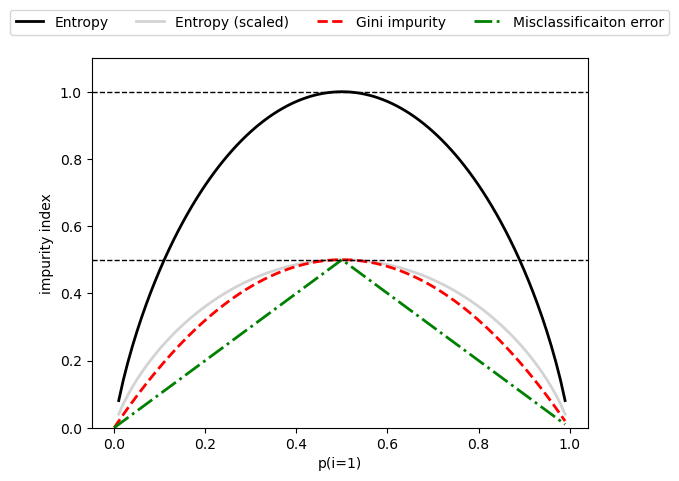

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p) * (1 - (p)) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)',
                         'Gini impurity', 'Misclassificaiton error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label = lab, linestyle = ls, lw = 2, color = c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')

Entropy has been scaled to show that the Gini impurity is intermediate criterion between entropy and misclassification error. 

## Building a decision tree

When building a decision tree, we must be careful about the depth of the tree. The deeper the decision tree, the more complex the decision boundary becomes, which might result in overfitting.

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

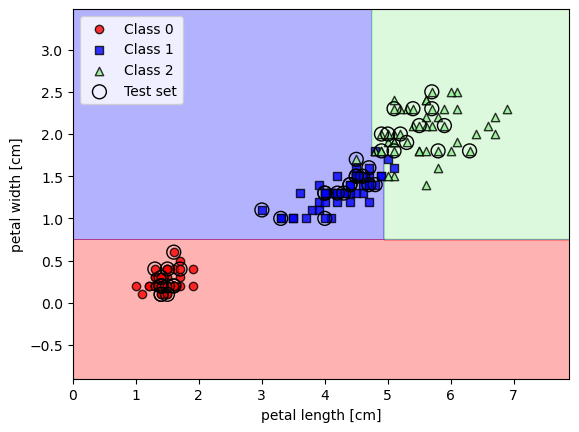

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 4, 
                                    random_state = 1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier = tree_model, test_idx = range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout
plt.show()

Visualised decision tree:

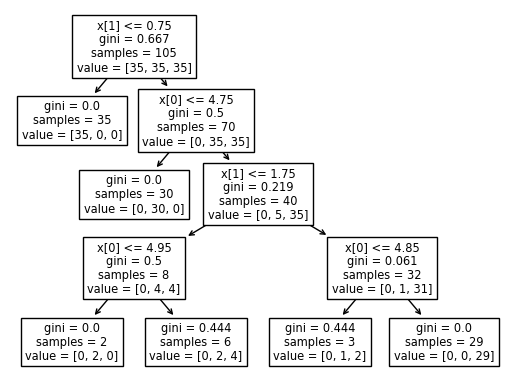

In [10]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.show()

## Combining multiple decision trees via random forests

Ensemble methods are techniques that combine multiple models together to create a new model with better performance. Individual models might be too sensitive for the data they have been trained on, thus producing outputs with high variance. Ensembling methods merge those models together, averaging outputs and reducing overfitting. Random Forest algorithm is one such example of ensembling methods. As its name suggests, this algorithm combines together decision trees. Individually, these decision trees can suffer from being overly complex (high variance) or too simple (high bias), but when pulled together, the new model finds a better trade-off between underfitting and overfitting and generalizes better for unseen data.

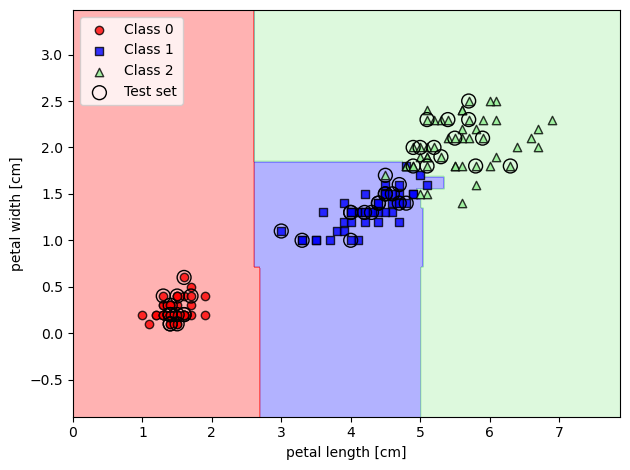

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini',
                                n_estimators = 25, 
                                random_state = 1, 
                                n_jobs = 2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx = range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In the above implementation of the Random Forest Classifier, the model combines the outputs of 25 decision trees and uses 'Gini impurity' criterion to select the feature for splitting the nodes. The model uses 2 cores to parallelize the training process, which was specified by the `n_jobs` argument.

## K-nearest neighbors - a lazy learning algorithm

K-nearest neighbors learning algorithm is a non-parametric model that determines the class of the input data point based on the majority vote of K-nearest neighbors, which are data points closest to the original data point according to a chosen distance metric. As a 'lazy' learning algorithm, KNN defers the computation till the time of making prediction, which is when it needs to identify the class of the new data point. One of the advantages of KNN is that it can adapt its output immediately as the new data points are introduced. The disadvantage is that its computational cost grows linearly with the data points.

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))

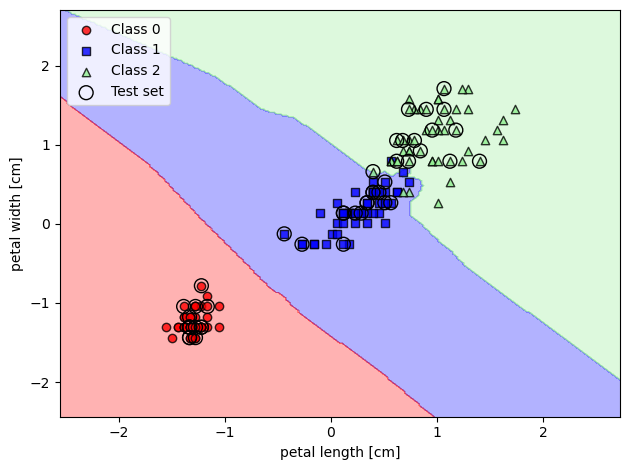

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,
                           p = 2,
                           metric = 'minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = knn, test_idx = range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()